## Coin Flip Experiments
August 22, 2022

Binomial Random Processes

Assume we have a coin with probability $p$ of coming up heads. We flip the coin $N$ times and count the number of heads, $h$. The expected value of $h$ is $E(h) = Np$ and the variance should be $Var(h) = Np(1-p)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [135]:
N = 3
p = 0.6
random_process = stats.binom(n = N , p = p)

In [70]:
# the less efficient way
nTrials = 100000
values = []
for i in range(nTrials):
    values.append(random_process.rvs())
print( sum(values) / nTrials )

1.8031


In [77]:
# the more efficient way
nTrials = 1000000
values = random_process.rvs( size=nTrials )

In [83]:
# pct error function
def pct_err(exp,thr):
        return (exp-thr)/thr

In [82]:
print("The average value is " + f"{values.mean():0.2}" )
print("The variance is "      + f"{values.var() :0.2}")

The average value is 1.8
The variance is 0.72


In [109]:
def print_value(name , exp , thr):
    print("The " + f"{name:9s}" + " value is " + f"{exp:0.2f}" + ", pct err: " + f"{100*pct_err(exp,thr):+0.2f}" + "%")

In [110]:
print_value("average"  , values.mean() , N*p                )
print_value("variance" , values.var()  , N*p*(1-p)          )
print_value("stdev"    , values.std()  , np.sqrt(N*p*(1-p)) )

The average   value is 1.80, pct err: -0.08%
The variance  value is 0.72, pct err: +0.17%
The stdev     value is 0.85, pct err: +0.09%


Take a minute and see if you can predict by hand the expected value and variance for the following random variable:

$pr(0) = 0.7 , pr(1) = 0.2 , pr(2) = 0.1$

$E(x) = 0\times 0.7 + 1 \times 0.2 + 2\times 0.1 = 0.4$

$E(x^2) = 0^2 \times 0.7 + 1^2 \times 0.2 + 2^2 \times 0.1 = 0.6$

$Var(x) = E(x^2) - E^2(x) = 0.6 - 0.4^2 = 0.44$

In [122]:
nTrials = int(1e6)
values = np.random.choice( [0,1,2] , nTrials , p=[0.7,0.2,0.1] )
print_value("average" , values.mean() , 0.4 )
print_value("variance" , values.var() , 0.44 )


The average   value is 0.40, pct err: +0.00%
The variance  value is 0.44, pct err: -0.04%


[699901 200195  99904]
[0 1 2]


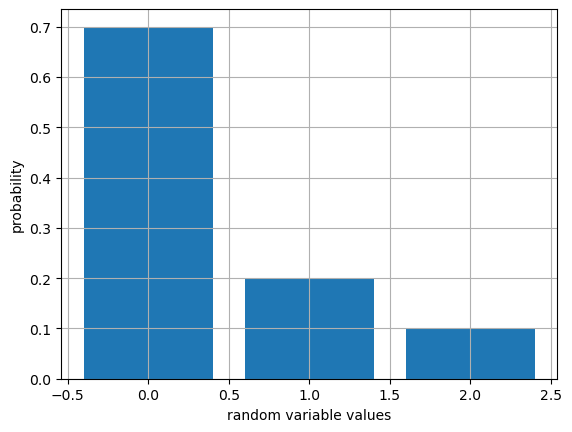

In [132]:
uVals,cnt = np.unique(values , return_counts=True )
print(cnt)
print(uVals)
plt.bar(uVals,cnt/nTrials)
plt.xlabel('random variable values')
plt.ylabel('probability')
plt.grid()
plt.show()